In [39]:
import pandas as pd
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
df1 = pd.read_csv("movies.csv")

In [41]:
print('Jumlah Data :', len(df1.iloc[:,1]))
print('Jumlah Fitur :', len(df1.iloc[1,:]))
print(f'Terdapat {len(df1.iloc[1,:])} Kolom Fitur pada Dataset yaitu:')
print('Fitur Data :', df1.columns.tolist()[:])
pd.options.display.max_columns = None
df1.head()

Jumlah Data : 62423
Jumlah Fitur : 3
Terdapat 3 Kolom Fitur pada Dataset yaitu:
Fitur Data : ['movieId', 'title', 'genres']


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [43]:
def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [44]:
df1['genres'] = df1['genres'].str.split('|')
df1['title'] = df1['title'].apply(clean_title)
movies_data = df1[['movieId', 'title', 'genres']]
unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()
print(movies_data.head())

   movieId                             title  \
0        1                    Toy Story 1995   
1        2                      Jumanji 1995   
2        3             Grumpier Old Men 1995   
3        4            Waiting to Exhale 1995   
4        5  Father of the Bride Part II 1995   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


In [45]:
print(f"Terdapat {movies_data['title'].nunique()} Judul Film")
print(f"Terdapat {len(unique_genres)} Genre Film.")
print("Genre Film:", unique_genres)

Terdapat 62298 Judul Film
Terdapat 20 Genre Film.
Genre Film: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


In [46]:
no_genres_count = movies_data[movies_data['genres'].apply(lambda x: '(no genres listed)' in x)].shape[0]
print(f"Terdapat {no_genres_count} film tanpa genre.")

movies_data = movies_data[~movies_data['genres'].apply(lambda x: '(no genres listed)' in x)]
unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()

print(f"Setelah penghapusan, terdapat {movies_data['title'].nunique()} Judul Film.")
print(f"Terdapat {len(unique_genres)} Genre Film setelah pembaruan.")
print("Genre Film:", unique_genres)

Terdapat 5062 film tanpa genre.
Setelah penghapusan, terdapat 57264 Judul Film.
Terdapat 19 Genre Film setelah pembaruan.
Genre Film: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir']


Visualisasi Dataset

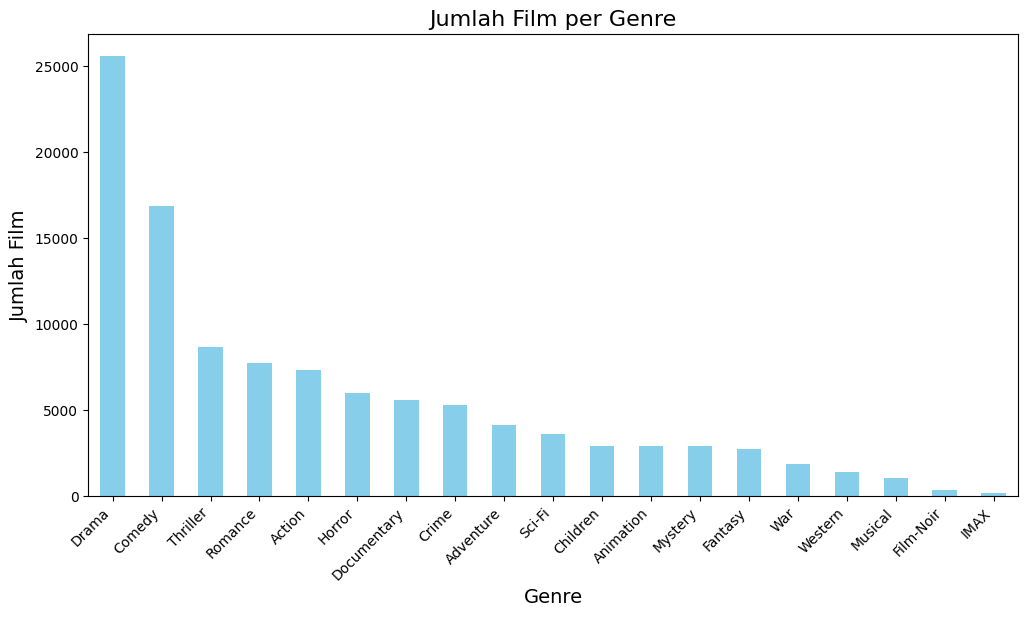

In [47]:
genre_counts = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Film per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Jumlah Film', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Ratings Dataset

In [48]:
df2 = pd.read_csv("ratings.csv")

In [49]:
print('Jumlah Data :', len(df2.iloc[:,1]))
print('Jumlah Fitur :', len(df2.iloc[1,:]))
print(f'Terdapat {len(df2.iloc[1,:])} Kolom Fitur pada Dataset yaitu:')
print('Fitur Data :', df2.columns.tolist()[:])
pd.options.display.max_columns = None
df2.head()

Jumlah Data : 25000095
Jumlah Fitur : 4
Terdapat 4 Kolom Fitur pada Dataset yaitu:
Fitur Data : ['userId', 'movieId', 'rating', 'timestamp']


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [50]:
ratings_data = df2.drop(['timestamp'], axis=1)
print(ratings_data.head())

   userId  movieId  rating
0       1      296     5.0
1       1      306     3.5
2       1      307     5.0
3       1      665     5.0
4       1      899     3.5


In [51]:
print("Jumlah Missing Values per Kolom:")
print(df2.isnull().sum())
print("\nJumlah Data Duplicates:")
print(df2.duplicated().sum())

Jumlah Missing Values per Kolom:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Jumlah Data Duplicates:
0


In [52]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 572.2 MB


In [53]:
print("Distribusi Rating:")
print(df2['rating'].value_counts())
print("\nRating Rata-Rata per Film:")
print(df2.groupby('movieId')['rating'].mean().head())
print("\nRating Rata-Rata per Pengguna:")
print(df2.groupby('userId')['rating'].mean().head())

Distribusi Rating:
rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

Rating Rata-Rata per Film:
movieId
1    3.893708
2    3.251527
3    3.142028
4    2.853547
5    3.058434
Name: rating, dtype: float64

Rating Rata-Rata per Pengguna:
userId
1    3.814286
2    3.630435
3    3.697409
4    3.378099
5    3.752475
Name: rating, dtype: float64


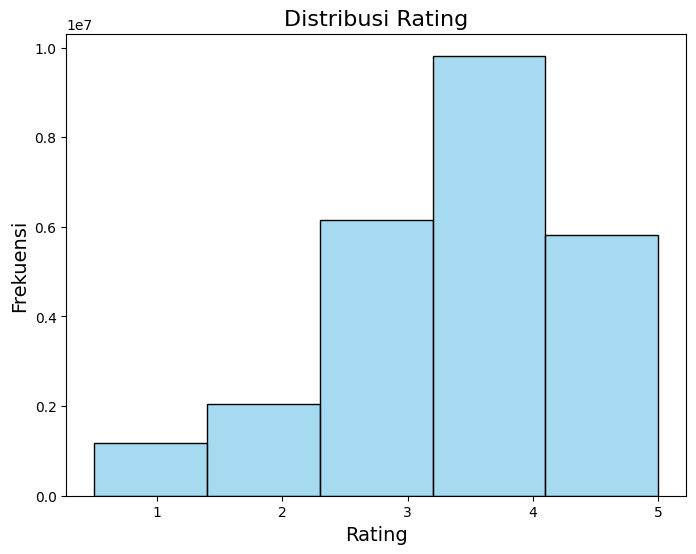

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribusi Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

In [55]:
combined_data = ratings_data.merge(movies_data, on='movieId')
print(combined_data.head())

   userId  movieId  rating                                       title  \
0       1      296     5.0                           Pulp Fiction 1994   
1       1      306     3.5  Three Colors Red Trois couleurs Rouge 1994   
2       1      307     5.0  Three Colors Blue Trois couleurs Bleu 1993   
3       1      665     5.0                            Underground 1995   
4       1      899     3.5                     Singin in the Rain 1952   

                             genres  
0  [Comedy, Crime, Drama, Thriller]  
1                           [Drama]  
2                           [Drama]  
3              [Comedy, Drama, War]  
4        [Comedy, Musical, Romance]  


Eksplorasi Dataset

In [56]:
avg_ratings_per_movie = combined_data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("Top 10 Film dengan Rating Rata-Rata Tertinggi:")
print(avg_ratings_per_movie.head(10))

Top 10 Film dengan Rating Rata-Rata Tertinggi:
title
Keep My Grave Open 1976                    5.0
The Ganzfeld Haunting 2014                 5.0
The Fox in the Chicken Coop 1978           5.0
Good Fortune 2009                          5.0
Model Minority 2012                        5.0
Good Morning TriState 2013                 5.0
Amori che non sanno stare al mondo 2017    5.0
Amore a prima vista 1999                   5.0
You Must Be Joking 2014                    5.0
Goodbye Boys 1964                          5.0
Name: rating, dtype: float64


In [57]:
movie_rating_counts = combined_data.groupby('title')['rating'].count().sort_values(ascending=False)
print("Top 10 Film dengan Jumlah Rating Terbanyak:")
print(movie_rating_counts.head(10))

Top 10 Film dengan Jumlah Rating Terbanyak:
title
Forrest Gump 1994                        81491
Shawshank Redemption The 1994            81482
Pulp Fiction 1994                        79672
Silence of the Lambs The 1991            74127
Matrix The 1999                          72674
Star Wars Episode IV  A New Hope 1977    68717
Jurassic Park 1993                       64144
Schindlers List 1993                     60411
Braveheart 1995                          59184
Fight Club 1999                          58773
Name: rating, dtype: int64


In [58]:
exploded_data = combined_data.explode('genres')
users_per_genre = exploded_data.groupby('genres')['userId'].nunique()

avg_rating_per_genre = exploded_data.groupby('genres')['rating'].mean()
top_movies_per_genre = (
    exploded_data.groupby(['genres', 'title'])['rating']
    .mean()
    .reset_index()
    .sort_values(['genres', 'rating'], ascending=[True, False])
    .groupby('genres')
    .head(3)
)

print("Jumlah Pengguna yang Memberi Rating pada Tiap Genre:")
print(users_per_genre)
print("\nRata-Rata Rating per Genre:")
print(avg_rating_per_genre)
print("\n3 Film Terbaik di Tiap Genre:")
print(top_movies_per_genre)

Jumlah Pengguna yang Memberi Rating pada Tiap Genre:
genres
Action         161975
Adventure      161821
Animation      140225
Children       148391
Comedy         162381
Crime          160855
Documentary     60393
Drama          162519
Fantasy        156809
Film-Noir       67849
Horror         141445
IMAX           119012
Musical        126133
Mystery        152209
Romance        161068
Sci-Fi         160063
Thriller       161948
War            146905
Western        110037
Name: userId, dtype: int64

Rata-Rata Rating per Genre:
genres
Action         3.466592
Adventure      3.517445
Animation      3.614946
Children       3.432507
Comedy         3.423993
Crime          3.685044
Documentary    3.705281
Drama          3.677185
Fantasy        3.511589
Film-Noir      3.925728
Horror         3.293563
IMAX           3.603712
Musical        3.554716
Mystery        3.670169
Romance        3.542712
Sci-Fi         3.478143
Thriller       3.522964
War            3.791466
Western        3.585755
Nam

In [59]:
vectorizer_title = TfidfVectorizer(ngram_range=(1,2))

tfidf_title = vectorizer_title.fit_transform(movies_data['title'])

def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Interstellar")
print(movie_results)

       movieId                             title                    genres
21199   109487                 Interstellar 2014            [Sci-Fi, IMAX]
60773   204120  The Science of Interstellar 2014             [Documentary]
19130    99663                 Visitors The 1972  [Crime, Drama, Thriller]
19132    99667         Excuse Me for Living 2012         [Comedy, Romance]
19129    99659             Sea of Grass The 1947          [Drama, Western]


Menggunakan TF-IDF untuk mencari 5 movies dengan judul yang mirip

In [60]:
def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Fast and Furious")
print(movie_results)

       movieId                                             title  \
13226    67923     Fast  Furious Fast and the Furious 4 The 2009   
4264      4369                     Fast and the Furious The 2001   
19769   102716   Fast  Furious 6 Fast and the Furious 6 The 2013   
6264      6383  2 Fast 2 Furious Fast and the Furious 2 The 2003   
13528    69945                     Fast and the Furious The 1955   

                                 genres  
13226  [Action, Crime, Drama, Thriller]  
4264          [Action, Crime, Thriller]  
19769   [Action, Crime, Thriller, IMAX]  
6264          [Action, Crime, Thriller]  
13528                  [Crime, Mystery]  


Mencari movies dengan genre yang mirip

In [61]:
vectorizer_genres = TfidfVectorizer(ngram_range=(1,2))
movies_data['genres_text'] = movies_data['genres'].apply(lambda x: ' '.join(x))

tfidf_genres = vectorizer_genres.fit_transform(movies_data['genres_text'])

def search_similar_genres(genres):
    query_vec = vectorizer_genres.transform([genres])
    similarity = cosine_similarity(query_vec, tfidf_genres).flatten()
    indices = np.argpartition(similarity, -10)[-10:]
    results = movies_data.iloc[indices][::-1]
    return results

gen = 'Adventure Action'
print(search_similar_genres(gen))

       movieId                                              title  \
32201   140401                  The Black Shield Of Falworth 1954   
42776   164604                                         Kicks 2016   
29028   133007                   Temple of a Thousand Lights 1965   
29025   133001                     The Spy Who Loved Flowers 1966   
43085   165249                                        Bagdad 1949   
43246   165599                                      Hayabusa 2011   
28905   132743                              The Lost Volcano 1950   
29032   133015                            Sandokan the Great 1963   
28648   132169  Time Traveller The Girl Who Leapt Through Time...   
27716   129990                                Sergeant Klems 1971   

            genres genres_text  
32201  [Adventure]   Adventure  
42776  [Adventure]   Adventure  
29028  [Adventure]   Adventure  
29025  [Adventure]   Adventure  
43085  [Adventure]   Adventure  
43246  [Adventure]   Adventure  
28905  [A

In [63]:
def scores_calculator(movie_id):
    similar_users = combined_data.loc[
        (combined_data['movieId'] == movie_id) & (combined_data['rating'] >= 4), 'userId'
    ].unique()

    similar_user_recs = combined_data.loc[
        (combined_data['userId'].isin(similar_users)) & (combined_data['rating'] >= 4), 'movieId'
    ].value_counts(normalize=True)

    all_user_recs = combined_data.loc[
        combined_data['movieId'].isin(similar_user_recs.index) & (combined_data['rating'] >= 4)
    ]
    all_user_recs = all_user_recs['movieId'].value_counts(normalize=True)

    selected_genres = combined_data.loc[combined_data['movieId'] == movie_id, 'genres'].iloc[0]
    if isinstance(selected_genres, list):
        selected_genres = " ".join(selected_genres)

    movies_with_similar_genres = search_similar_genres(selected_genres)
    similar_genre_ids = movies_with_similar_genres['movieId']

    similar_user_recs.loc[similar_user_recs.index.isin(similar_genre_ids)] *= 1.5
    all_user_recs.loc[all_user_recs.index.isin(similar_genre_ids)] *= 0.9

    scores = pd.DataFrame({
        'similar': similar_user_recs,
        'all': all_user_recs
    }).fillna(0)

    scores['score'] = np.where(scores['all'] > 0, scores['similar'] / scores['all'], 0)
    return scores.sort_values('score', ascending=False)

scores_calculator(3114)

,similar,all,score
movieId,,,
115879,8.366523e-06,1.449568e-06,5.771735
186177,1.476445e-06,2.899136e-07,5.092707
114240,1.476445e-06,2.899136e-07,5.092707
209121,3.280990e-07,8.053157e-08,4.074166
134160,3.280990e-07,8.053157e-08,4.074166
...,...,...,...
853,3.280990e-07,3.543389e-06,0.092595
601,3.280990e-07,3.704452e-06,0.088569
797,3.280990e-07,3.865515e-06,0.084878


# RECOMMENDATION RESULT

In [64]:
def recommendation_results(user_input, title=0):
    title_candidates = search_by_title(user_input)
    movie_id = title_candidates.iloc[title]['movieId']
    scores = scores_calculator(movie_id)
    results = scores.head(10).merge(movies_data, left_index=True, right_on='movieId')[['title', 'score', 'genres']]
    resutls = results.rename(columns={'title': 'title', 'genres': 'genres'}, inplace=True)
    return results

user_input = "Interstellar"
print("Here a similar movies: ")
for i in range(5):
    print(i, ": ", search_by_title(user_input)['title'].iloc[i])

title = 0
print("Recommendation_results: ")
print(recommendation_results(user_input))

Here a similar movies: 
0 :  Interstellar 2014
1 :  The Science of Interstellar 2014
2 :  Visitors The 1972
3 :  Excuse Me for Living 2012
4 :  Sea of Grass The 1947
Recommendation_results: 
                                      title     score  \
21199                     Interstellar 2014  9.329121   
21495                    Transcendence 2014  7.077710   
19891                          Elysium 2013  6.458622   
20247                          Gravity 2013  6.082041   
21691                 Edge of Tomorrow 2014  6.047429   
27329               Saban Son of Saban 1977  5.597472   
24292                         McCullin 2012  5.597472   
53804                           The Factory  5.597472   
28412  The Great American Girl Robbery 1979  5.597472   
28403                        Lily  Kat 2015  5.597472   

                              genres  
21199                 [Sci-Fi, IMAX]  
21495          [Drama, Sci-Fi, IMAX]  
19891  [Action, Drama, Sci-Fi, IMAX]  
20247         [Action, Sc